# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Niken Maharani Permata
- **Email:** nikenmaharani24@gmail.com
- **ID Dicoding:** Niken Maharani Permata

## Menentukan Pertanyaan Bisnis

- Apakah musim tertentu mempengaruhi jumlah penyewaan sepeda?
- Apakah terdapat korelasi antara suhu, tingkat kelembapan, dan kecepatan angin mempengaruhi penyewaan sepeda?
- Apa saja hari yang mencatat penyewaan sepeda terbanyak?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install streamlit
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [8]:
from google.colab import files

# Upload 'day.csv'
uploaded_day = files.upload()
file_name_day = next(iter(uploaded_day))

# Upload 'hour.csv'
uploaded_hour = files.upload()
file_name_hour = next(iter(uploaded_hour))

# Read 'day.csv' into DataFrame
import pandas as pd
df_day = pd.read_csv(file_name_day)

# Read 'hour.csv' into DataFrame
df_hour = pd.read_csv(file_name_hour)

# Display DataFrame from 'day.csv'
print("Data from day.csv:")
print(df_day)

# Display DataFrame from 'hour.csv'
print("\nData from hour.csv:")
print(df_hour)


Saving day.csv to day (2).csv


Saving hour.csv to hour (1).csv
Data from day.csv:
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp 

### Assessing Data

In [9]:
# Checking for duplicate rows in df_day
duplicate_rows_day = df_day[df_day.duplicated()]

# Checking for duplicate rows in df_hour
duplicate_rows_hour = df_hour[df_hour.duplicated()]

# Displaying duplicate rows, if any
print("Duplicate rows in day.csv:")
print(duplicate_rows_day)

print("\nDuplicate rows in hour.csv:")
print(duplicate_rows_hour)



Duplicate rows in day.csv:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Duplicate rows in hour.csv:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [10]:
# Part 2 checking missing values
# Checking for missing values in df_day
missing_values_day = df_day.isnull().sum()

# Checking for missing values in df_hour
missing_values_hour = df_hour.isnull().sum()

# Displaying missing values count, if any
print("Missing values count in day.csv:")
print(missing_values_day)

print("\nMissing values count in hour.csv:")
print(missing_values_hour)


Missing values count in day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values count in hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [11]:
# Part 3:Check temperature value maks 40
# Define a threshold for valid temperature values
min_temp = -10  # Example minimum temperature
max_temp = 40   # Example maximum temperature

# Filter rows where temperature is outside the valid range
invalid_temp_day = df_day[(df_day['temp'] < min_temp) | (df_day['temp'] > max_temp)]
invalid_temp_hour = df_hour[(df_hour['temp'] < min_temp) | (df_hour['temp'] > max_temp)]

# Display rows with potentially invalid temperature values
print("Rows with potentially invalid temperature values in day.csv:")
print(invalid_temp_day)

print("\nRows with potentially invalid temperature values in hour.csv:")
print(invalid_temp_hour)


Rows with potentially invalid temperature values in day.csv:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Rows with potentially invalid temperature values in hour.csv:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [13]:
# Define a function to detect outliers using IQR method
def detect_outliers_iqr(df, threshold=1.5):
    outliers = pd.DataFrame()
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Detect outliers in df_day
outliers_day = detect_outliers_iqr(df_day)

# Detect outliers in df_hour
outliers_hour = detect_outliers_iqr(df_hour)

# Display outliers, if any
print("Outliers in day.csv:")
print(outliers_day)

print("\nOutliers in hour.csv:")
print(outliers_hour)


Outliers in day.csv:
     instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
16       NaN     NaN NaN   NaN        1      NaN         NaN         NaN   
51       NaN     NaN NaN   NaN        1      NaN         NaN         NaN   
104      NaN     NaN NaN   NaN        1      NaN         NaN         NaN   
149      NaN     NaN NaN   NaN        1      NaN         NaN         NaN   
184      NaN     NaN NaN   NaN        1      NaN         NaN         NaN   
247      NaN     NaN NaN   NaN        1      NaN         NaN         NaN   
282      NaN     NaN NaN   NaN        1      NaN         NaN         NaN   
314      NaN     NaN NaN   NaN        1      NaN         NaN         NaN   
327      NaN     NaN NaN   NaN        1      NaN         NaN         NaN   
359      NaN     NaN NaN   NaN        1      NaN         NaN         NaN   
366      NaN     NaN NaN   NaN        1      NaN         NaN         NaN   
380      NaN     NaN NaN   NaN        1      NaN         NaN       

### Cleaning Data

In [18]:
# Define a function to remove outliers using IQR method
def remove_outliers_iqr(df, threshold=1.5):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from df_day
cleaned_df_day = remove_outliers_iqr(df_day)

# Remove outliers from df_hour
cleaned_df_hour = remove_outliers_iqr(df_hour)

# Print the cleaned version of df_day
print("Cleaned version of day.csv:")
print(cleaned_df_day)

# Print the cleaned version of df_hour
print("\nCleaned version of hour.csv:")
print(cleaned_df_hour)


Cleaned version of day.csv:
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  c

## Exploratory Data Analysis (EDA)

### Explore ...

In [32]:
# Group by 'season' and 'yr', and calculate the sum of 'cnt' for each group
grouped_data = data.groupby(['season', 'yr'])['cnt'].sum().reset_index()

# Map the year values to 'yr' column
grouped_data['yr'] = grouped_data['yr'].map({0: 2011, 1: 2012})  # Assuming 0 represents 2011 and 1 represents 2012

# Replace season codes with descriptions
grouped_data['season'] = grouped_data['season'].replace({1: 'Summer',
                                                         2: 'Fall/Autumn',
                                                         3: 'Winter',
                                                         4: 'Spring'})

# Display the grouped data
print("Bike's rent Troughout Each Season:")
print(grouped_data)

Bike's rent Troughout Each Season:
        season    yr     cnt
0       Summer  2011  150000
1       Summer  2012  321348
2  Fall/Autumn  2011  347316
3  Fall/Autumn  2012  571273
4       Winter  2011  419650
5       Winter  2012  641479
6       Spring  2011  326137
7       Spring  2012  515476


In [75]:
# Checking correlation between temperature, humidity, and windspeed

# Select columns for correlation analysis
columns = ['hum', 'temp', 'windspeed', 'cnt']

# Calculate the correlation matrix
correlation_matrix = data[columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                hum      temp  windspeed       cnt
hum        1.000000  0.126963  -0.248489 -0.100659
temp       0.126963  1.000000  -0.157944  0.627494
windspeed -0.248489 -0.157944   1.000000 -0.234545
cnt       -0.100659  0.627494  -0.234545  1.000000


In [74]:
# Preprocessing
data['dteday'] = pd.to_datetime(data['dteday'])
data['day_of_week'] = data['dteday'].dt.day_name()

# Grouping by day of the week and calculating descriptive statistics
weekly_trend_stats = data.groupby('day_of_week')['cnt'].describe()

# Calculate mean, min, and max
weekly_trend_stats['min'] = data.groupby('day_of_week')['cnt'].min()
weekly_trend_stats['mean'] = data.groupby('day_of_week')['cnt'].mean()
weekly_trend_stats['max'] = data.groupby('day_of_week')['cnt'].max()

# Sort the days of the week
weekly_trend_stats = weekly_trend_stats.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Find top 3 days with highest mean rental counts
top_days = weekly_trend_stats.nlargest(3, 'mean').index

# Print the resulting DataFrame
print("Descriptive Statistics for Bike Rentals by Day of the Week:")
print(weekly_trend_stats)

Descriptive Statistics for Bike Rentals by Day of the Week:
             count         mean          std   min      25%     50%      75%  \
day_of_week                                                                    
Monday       105.0  4338.123810  1793.074013    22  3310.00  4359.0  5875.00   
Tuesday      104.0  4510.663462  1826.911642   683  3579.25  4576.5  5769.00   
Wednesday    104.0  4548.538462  2038.095884   441  2653.25  4642.5  6175.75   
Thursday     104.0  4667.259615  1939.433317   431  3270.75  4721.0  6286.00   
Friday       104.0  4690.288462  1874.624870  1167  3390.75  4601.5  5900.50   
Saturday     105.0  4550.542857  2196.693009   627  2732.00  4521.0  6140.00   
Sunday       105.0  4228.828571  1872.496629   605  2918.00  4334.0  5464.00   

              max  
day_of_week        
Monday       7525  
Tuesday      7767  
Wednesday    8173  
Thursday     7804  
Friday       8362  
Saturday     8714  
Sunday       8227  


## Visualization & Explanatory Analysis

### Pertanyaan 1:

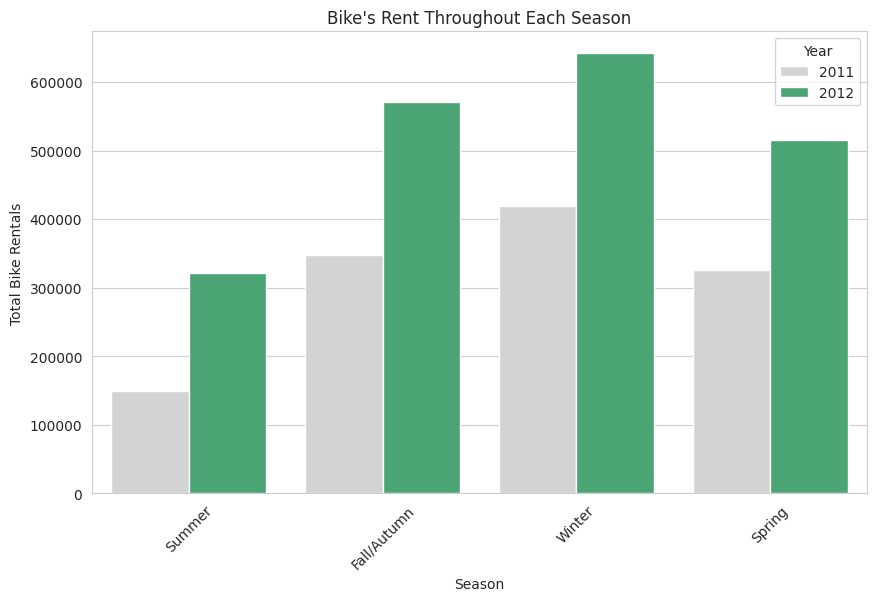

In [33]:
# Set palette colors for each year
palette = {2011: 'lightgrey', 2012: 'mediumseagreen'}

# Plotting the grouped data
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='season', y='cnt', hue='yr', palette=palette)
plt.title("Bike's Rent Throughout Each Season")
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

### Pertanyaan 2:

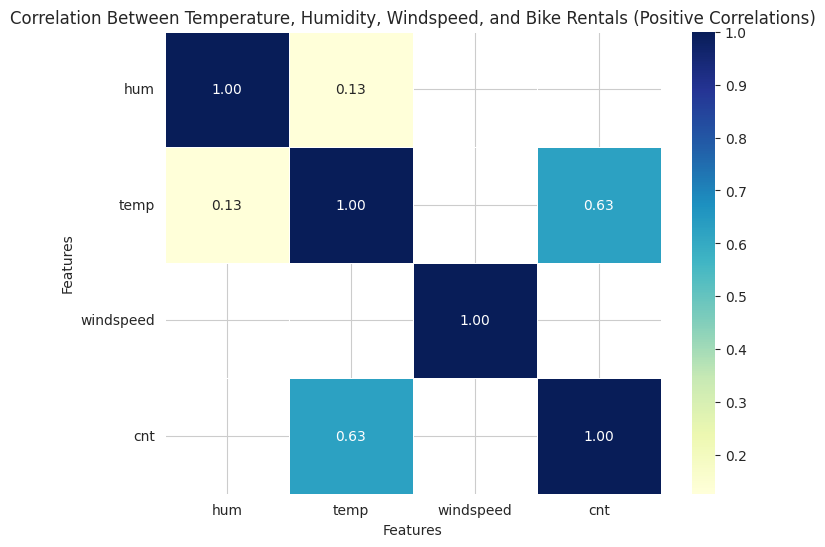

In [35]:
# Calculate the correlation matrix
correlation_matrix = data[columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with positive correlation values highlighted
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5,
            mask = correlation_matrix < 0)

# Set title and labels
plt.title('Correlation Between Temperature, Humidity, Windspeed, and Bike Rentals (Positive Correlations)')
plt.xlabel('Features')
plt.ylabel('Features')

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Show plot
plt.show()

### Pertanyaan 3

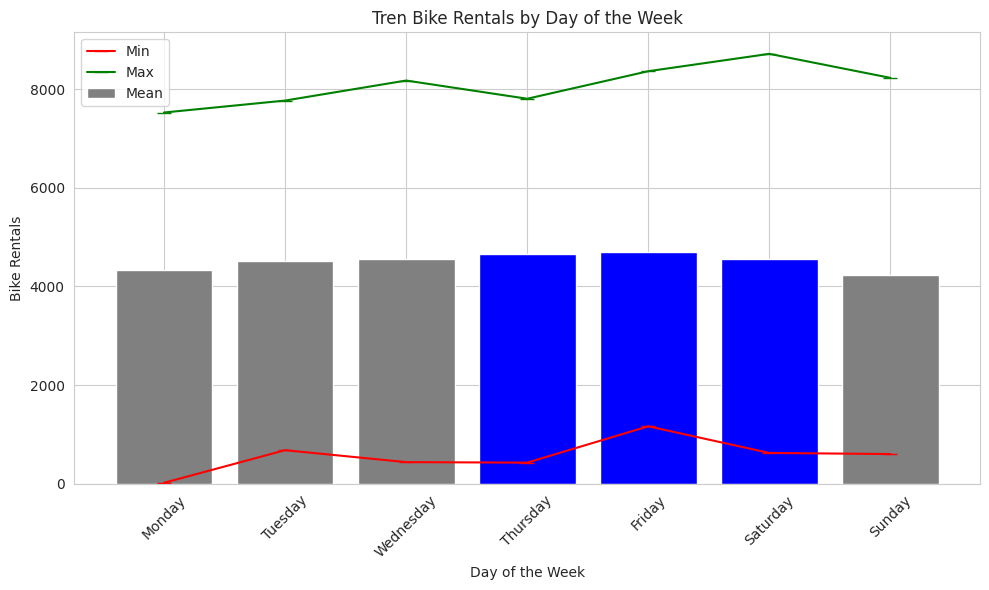

In [71]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting bars for mean, min, and max
plt.bar(weekly_trend_stats.index, weekly_trend_stats['mean'], color=['blue' if day in top_days else 'grey' for day in weekly_trend_stats.index], label='Mean')
plt.plot(weekly_trend_stats.index, weekly_trend_stats['min'], color='red', marker='_', markersize=10, label='Min')
plt.plot(weekly_trend_stats.index, weekly_trend_stats['max'], color='green', marker='_', markersize=10, label='Max')

plt.title('Tren Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Bike Rentals')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Conclusion


- Yes, the season affects the number of bike rentals. From the visualization results, it was found that winter recorded the most bike rentals in a year. While the fewest rentals are recorded in the summer, This can be one of the reasons for the company to provide special promotions in the season that record the lowest number of bike rentals to increase the number of rentals.
- The highest positive correlation between humidity, temperature, windspeed, and cnt was only recorded between temperature and the number of rentals. So it can be seen that temperature has a positive relationship with the number of bicycle rentals. The more extreme the temperature, the more bicycle rentals are made.
- The days that recorded the highest number of rentals were Thursday, Friday, and Saturday. This can be one of the reasons for the company to prepare more bicycles for rent to overcome the overflow of tenants.
